In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')
print(df_train.shape, df_test.shape, submission.shape)

(1459, 11) (715, 10) (715, 2)


In [3]:
list(df_train)

['id',
 'hour',
 'hour_bef_temperature',
 'hour_bef_precipitation',
 'hour_bef_windspeed',
 'hour_bef_humidity',
 'hour_bef_visibility',
 'hour_bef_ozone',
 'hour_bef_pm10',
 'hour_bef_pm2.5',
 'count']

In [5]:
# 5. Iteration 3: Setup with Advance Preprocessing

reg1 = setup(df_train, target = 'count', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             numeric_features=['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
                            'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
             polynomial_features = True, trigonometry_features = True, remove_outliers = True, outliers_threshold = 0.01,
             silent = True #silent is set to True for unattended run during kernel execution
             )

,Description,Value
0,session_id,123
1,Target,count
2,Original Data,"(1459, 11)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1010, 16)"


In [6]:
compare_models(sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,26.5119,1546.3174,39.1802,0.7736,0.4919,0.7879,0.0850
gbr,Gradient Boosting Regressor,27.7103,1616.8425,40.0037,0.7640,0.5318,0.8145,0.0460
lightgbm,Light Gradient Boosting Machine,27.6616,1653.6751,40.4456,0.7590,0.5386,0.7988,0.0170
rf,Random Forest Regressor,27.9209,1681.5506,40.8361,0.7548,0.5065,0.8036,0.1260
knn,K Neighbors Regressor,34.2762,2260.4251,47.3692,0.6709,0.6026,0.8740,0.0070
ada,AdaBoost Regressor,40.5378,2492.1482,49.8223,0.6339,0.7799,1.5095,0.0210
ridge,Ridge Regression,38.0910,2684.7699,51.6604,0.6085,0.6944,1.0091,0.0040
lr,Linear Regression,38.1007,2685.6661,51.6645,0.6083,0.6985,1.0088,0.2610
br,Bayesian Ridge,38.2338,2701.7352,51.8367,0.6061,0.6831,1.0144,0.0060
huber,Huber Regressor,37.1256,2720.9206,51.9474,0.6052,0.6743,0.9220,0.0070


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [7]:
et = create_model('et', verbose = False)
gbr = create_model('gbr', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
rf = create_model('rf', verbose = False)
knn = create_model('knn', verbose = False)

In [8]:
# Tune Models

tuned_et = tune_model(et, optimize='RMSE', n_iter=10)
tuned_gbr = tune_model(gbr, optimize='RMSE', n_iter=10)
tuned_lightgbm = tune_model(lightgbm, optimize='RMSE', n_iter=100)
tuned_rf = tune_model(rf, optimize='RMSE', n_iter=100)
tuned_knn = tune_model(knn, optimize='RMSE', n_iter=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30.6832,2110.1486,45.9364,0.7351,0.4847,0.5009
1,29.1918,1571.5801,39.6432,0.7319,0.6312,0.9621
2,33.5795,2067.5740,45.4706,0.7002,0.8140,2.6815
3,28.7946,1502.5010,38.7621,0.7471,0.5156,0.5529
4,35.4008,2658.2269,51.5580,0.6689,0.5763,0.6937
5,28.7534,1638.1877,40.4745,0.7408,0.4951,0.5072
6,34.5874,2221.2891,47.1306,0.7575,0.5184,0.5210
7,32.9583,1979.7966,44.4949,0.7341,0.4960,0.5821
8,29.5606,1554.6676,39.4293,0.7222,0.7380,1.3536


In [9]:
blend_all = blend_models(estimator_list = [tuned_et, tuned_gbr, tuned_lightgbm, tuned_rf, tuned_knn])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.6002,1730.7609,41.6024,0.7827,0.4333,0.4338
1,27.7014,1543.7624,39.2907,0.7366,0.6046,1.0351
2,25.7060,1510.2668,38.8622,0.7810,0.6993,2.4706
3,25.1883,1434.0981,37.8695,0.7586,0.4191,0.3885
4,29.8212,2209.5588,47.0059,0.7247,0.5065,0.6317
5,25.5860,1274.8439,35.7050,0.7983,0.4071,0.3864
6,27.9224,1384.5959,37.2102,0.8488,0.3665,0.3415
7,28.5757,1728.2891,41.5727,0.7679,0.4432,0.5710
8,25.3236,1215.1968,34.8597,0.7829,0.7098,1.4147


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


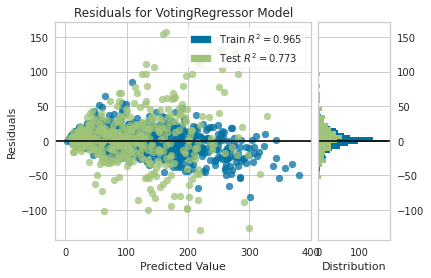

In [10]:
plot_model(blend_all)

In [11]:
predict_model(blend_all)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,25.0247,1368.3163,36.9908,0.7733,0.5289,0.7968


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_bef_temperature_Power2,sin(hour),cos(hour_bef_ozone),hour_bef_visibility_Power2,hour_Power2,hour_bef_humidity_Power2,count,Label
0,-1.414396,-1.543694,0.290601,-0.180057,0.439062,-1.018779,1.022027,5.335881e-08,-3.949213e-08,-3.289875e-08,0.142104,1.145264,0.206181,1.127019,-1.109066,-0.958500,63.0,63.890972
1,-0.122966,-1.255161,-2.084230,-0.180057,-0.662203,0.257341,-0.423405,-2.505106e-01,1.582940e-01,1.512895e+00,-1.494369,0.144507,0.411605,-0.647186,-1.060832,0.069708,11.0,22.587343
2,1.370448,-1.255161,-1.433066,-0.180057,-1.176126,1.729788,-1.763495,-1.792698e+00,-4.032389e-01,-3.289875e-08,-1.211166,0.144507,1.105607,-1.453255,-1.060832,2.011081,8.0,22.036957
3,1.510406,-1.687961,-1.107484,-0.180057,-0.809038,-0.626126,0.902869,-1.314088e+00,1.479548e+00,-4.438424e-01,-1.022671,-0.057145,0.995310,0.945245,-1.115096,-0.706841,62.0,59.795855
4,1.634459,1.053103,-0.858510,-0.180057,1.466909,-1.804083,1.022027,2.280991e-01,1.913253e-01,-1.072794e+00,-0.857434,0.157020,-0.003349,1.127019,1.061505,-1.289253,136.0,125.786947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.424142,-0.533828,-2.026774,-0.180057,-0.441950,1.189891,-0.110833,-1.420446e+00,1.252626e-01,-4.438424e-01,-1.474410,1.356585,1.027946,-0.343089,-0.729217,1.205321,192.0,145.146825
434,0.866282,1.485903,-0.781903,-0.180057,0.145392,0.846320,-0.817143,-3.779514e-02,3.895134e-01,4.534196e-02,-0.802913,-0.069792,0.238887,-0.967753,1.803117,0.749189,123.0,110.815747
435,-0.213621,-0.245295,-0.590384,-0.180057,-1.616632,0.110097,-0.896581,-1.367267e+00,6.867955e-01,3.248758e-01,-0.659041,-0.834516,1.012220,-1.023982,-0.512159,-0.079939,78.0,80.258552
436,0.067885,0.764570,1.937661,-0.180057,1.613744,-1.215105,1.022027,1.344855e+00,-3.949213e-08,-3.289875e-08,2.253898,-1.430920,-1.338813,1.127019,0.627391,-1.062759,185.0,281.449557


In [12]:
final_blender = finalize_model(blend_all)

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 

In [13]:
predictions = predict_model(final_blender, data = df_test)
predictions.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,Label
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0,110.695429
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0,221.721589
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0,79.223124
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0,45.455869
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0,45.323988


In [14]:
submission['count'] = predictions['Label']
print(submission[:10])
submission.to_csv('using_pycaret.csv')

   id       count
0   0  110.695429
1   1  221.721589
2   2   79.223124
3   4   45.455869
4   5   45.323988
5  10  132.283280
6  11  197.515054
7  12  279.546653
8  15   33.828105
9  17  108.012070
